In [1]:
from utils import *
import pandas as pd
import pickle
fig_prefix = 'twitter_figs/'


In [2]:

import networkx as nx

In [3]:
def get_key(my_dict, vals):
    result = []
    for key, value in my_dict.items():
        if value in vals:
            result.append(key)
    if len(result) != len(vals):
        print('some vals not in dict')
        return []
    return result

def plot_S(node_map, S, G1, G2, save_path, plot=True, fig_size=(10,10), node_size=30, with_labels=False, width=0.2):
    if len(node_map)!=0:
        original_S = get_key(node_map, S)
    else:
        original_S = S
    g = G1.subgraph(original_S)
    h = G2.subgraph(original_S)
    h_deg = [deg for node,deg in h.degree()]
    if plot:
        fig, axes = plt.subplots(figsize=fig_size, nrows=1, ncols=1)
        nx.draw_networkx(g, ax=axes, with_labels=with_labels, node_size=node_size, width=width)
        axes.set_axis_off()
        plt.savefig(save_path + '_connect.png')
        plt.show()

        fig, axes = plt.subplots(figsize=fig_size, nrows=1, ncols=1)
        nx.draw_networkx(h, ax=axes, with_labels=with_labels, node_size=node_size, width=width)
        axes.set_axis_off()

        plt.savefig(save_path + '_dense.png')
        plt.show()
    
    k = 1
    while is_k_connected(h, k):
        k += 1
    try:
        print('min deg \t average deg \t max deg \t triangle \t k-connectivity')
        print(min(h_deg), np.average(h_deg), max(h_deg), sum(nx.triangles(h).values())/3, k-1)
    except nx.NetworkXError:
        print('subgraph of H not connected')
#     return g, h

In [4]:
node_map = {}
cur_node_ind = 0

In [5]:
def read_graph(gt, node_map, node_index, start_date=1, end_date=28, weighted=False):
    g = nx.Graph()
#     node_mapping = {}
    path_pre = 'twitter_mancer/dataset/'

#     graph_types = ["quote", "reply", "retweet"]
    filenames = [gt+"-2018-02-"+str(i).zfill(2)+".txt" for i in xrange(int(start_date), int(end_date)+1)]
    for filename in filenames:
        t = 0
        with open(path_pre+filename, 'r') as f:
            for edge in f:
                nodes = edge.split()
                u = nodes[0]
                v = nodes[1]
                if (u == "deleted") or (v == "deleted"):
                    pass
                elif ( u == v ):
                    pass
                else:
                    if u not in node_map:
                        node_map[u] = node_index
                        node_index += 1
                    if v not in node_map:
                        node_map[v] = node_index
                        node_index += 1
                    if weighted:
                        if g.has_edge(node_map[u],node_map[v]):
                            g[node_map[u]][node_map[v]]['weight'] += 1
                        else:
                            g.add_edge(node_map[u],node_map[v], weight=1)
                    else:
                        g.add_edge(node_map[u],node_map[v])
    return g, node_index

In [6]:
replyG, cur_node_ind = read_graph('reply', node_map, cur_node_ind)
quoteG, cur_node_ind = read_graph('quote', node_map, cur_node_ind)

In [7]:
common = (set(replyG.nodes) & set(quoteG.nodes))

print '# of common nodes in retweet and quote', len(common)
print '# of edges in the reply subgraph induced by common nodes', len(replyG.subgraph(common).edges)
print '# of edges in the quote subgraph induced by common nodes', len(quoteG.subgraph(common).edges)    


# of common nodes in retweet and quote 153581
# of edges in the reply subgraph induced by common nodes 460149
# of edges in the quote subgraph induced by common nodes 479474


# new

In [23]:
quote_reply_S = []
for k in [30, 37, 40]:
    S, mindeg = k_conn_min_deg(quoteG.subgraph(common), replyG.subgraph(common), k, verbose=False)
    print 'size of dense-connected subgraph', len(S)
    print '# of edges in the k-connected quote subgraph', len(quoteG.subgraph(S).edges)
    print '# of edges in the dense reply subgraph', len(replyG.subgraph(S).edges) 
    
    plot_S(dict(), S, quoteG, replyG, fig_prefix + 'quote_reply_k=' + str(k),plot=False)
    
    quote_reply_S.append(S)

size of dense-connected subgraph 294
# of edges in the k-connected quote subgraph 11511
# of edges in the dense reply subgraph 9933
min deg 	 average deg 	 max deg 	 triangle 	 k-connectivity
(41, 67.57142857142857, 181, 89138, 41)
size of dense-connected subgraph 288
# of edges in the k-connected quote subgraph 11688
# of edges in the dense reply subgraph 9356
min deg 	 average deg 	 max deg 	 triangle 	 k-connectivity
(38, 64.97222222222223, 178, 79906, 38)
size of dense-connected subgraph 276
# of edges in the k-connected quote subgraph 11386
# of edges in the dense reply subgraph 8568
min deg 	 average deg 	 max deg 	 triangle 	 k-connectivity
(36, 62.08695652173913, 172, 71144, 36)


In [5]:
retweetG, cur_node_ind = read_graph('retweet', node_map, cur_node_ind)

In [19]:
common = (set(replyG.nodes) & set(retweetG.nodes))

print '# of common nodes in retweet and quote', len(common)
print '# of edges in the reply subgraph induced by common nodes', len(replyG.subgraph(common).edges)
print '# of edges in the retweet subgraph induced by common nodes', len(retweetG.subgraph(common).edges)    


# of common nodes in retweet and quote 225465
# of edges in the reply subgraph induced by common nodes 609573
# of edges in the retweet subgraph induced by common nodes 2137948


size of dense-connected subgraph 470
# of edges in the k-connected reply subgraph 9537
# of edges in the dense retweet subgraph 85289


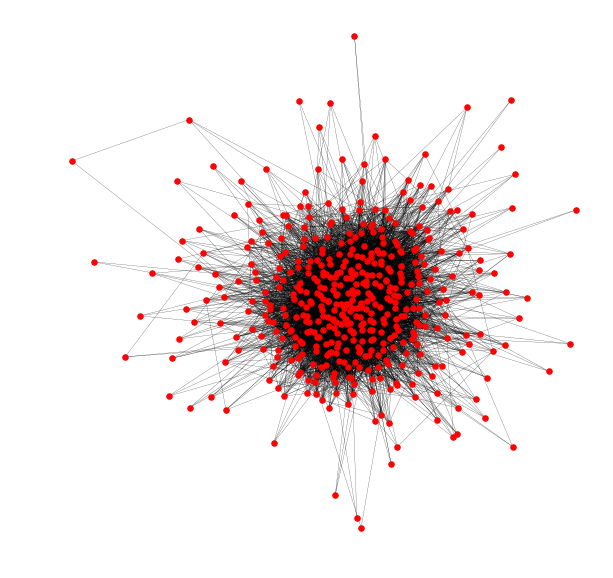

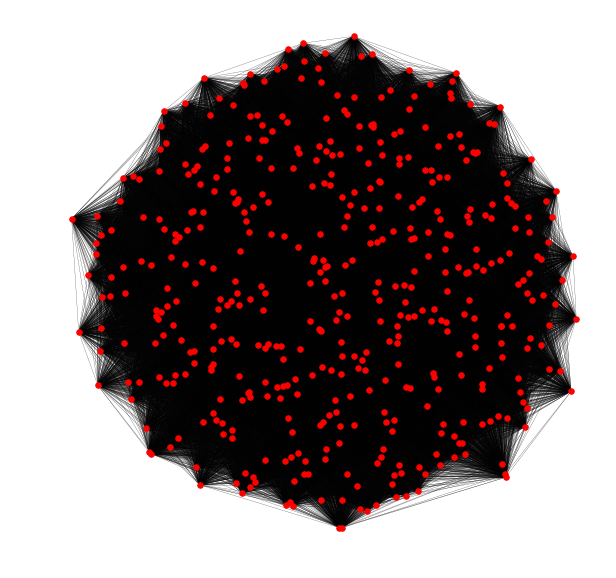

min deg 	 average deg 	 max deg 	 diameter 	 triangle 	 shortest path
(275, 362.93191489361703, 468, 2, 8440581, 1.2261579639794946)
size of dense-connected subgraph 543
# of edges in the k-connected reply subgraph 11988
# of edges in the dense retweet subgraph 103572


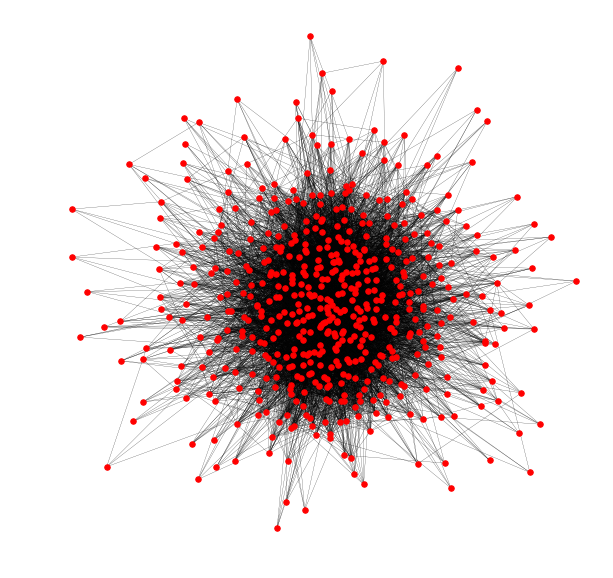

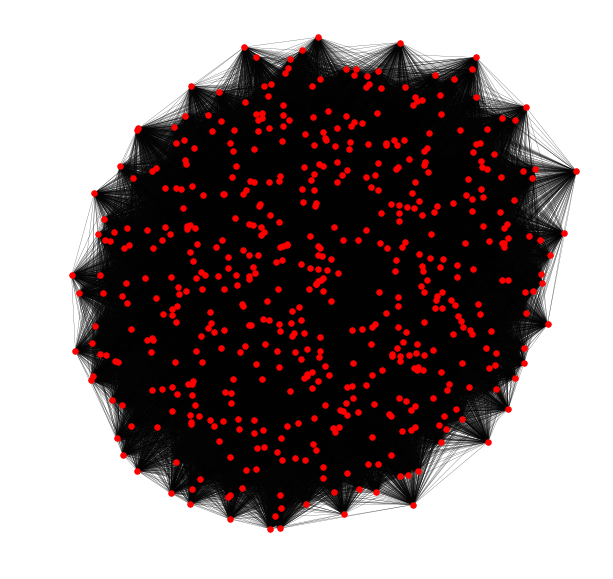

min deg 	 average deg 	 max deg 	 diameter 	 triangle 	 shortest path
(266, 381.4806629834254, 537, 2, 10237570, 1.2961611384069642)
size of dense-connected subgraph 501
# of edges in the k-connected reply subgraph 11750
# of edges in the dense retweet subgraph 90380


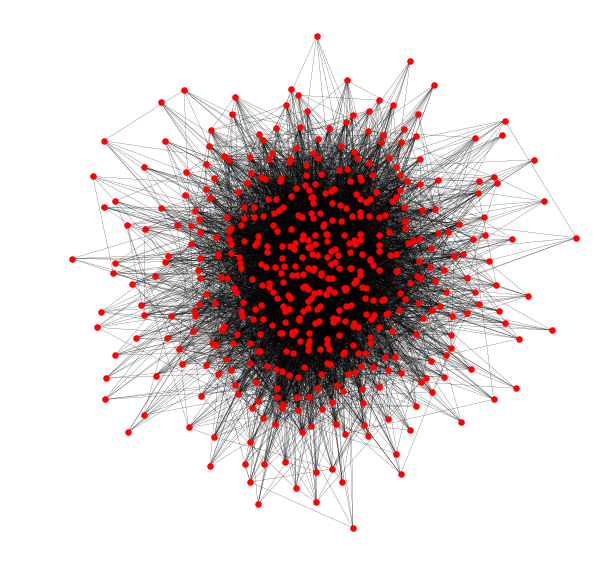

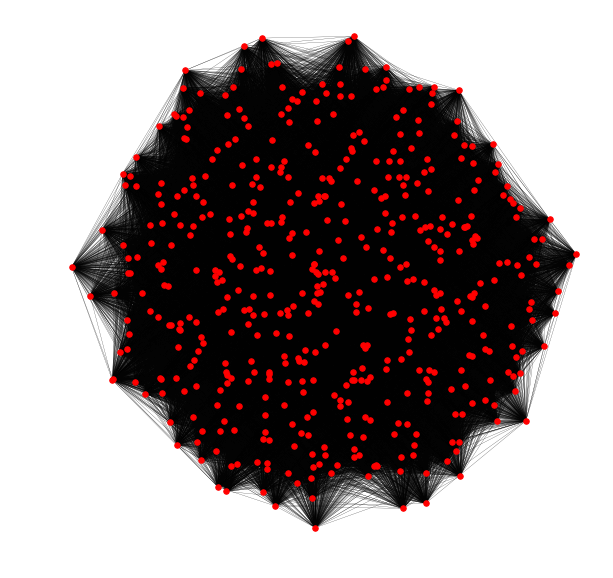

min deg 	 average deg 	 max deg 	 diameter 	 triangle 	 shortest path
(256, 360.7984031936128, 494, 2, 8568410, 1.2784031936127744)
size of dense-connected subgraph 496
# of edges in the k-connected reply subgraph 12196
# of edges in the dense retweet subgraph 87479


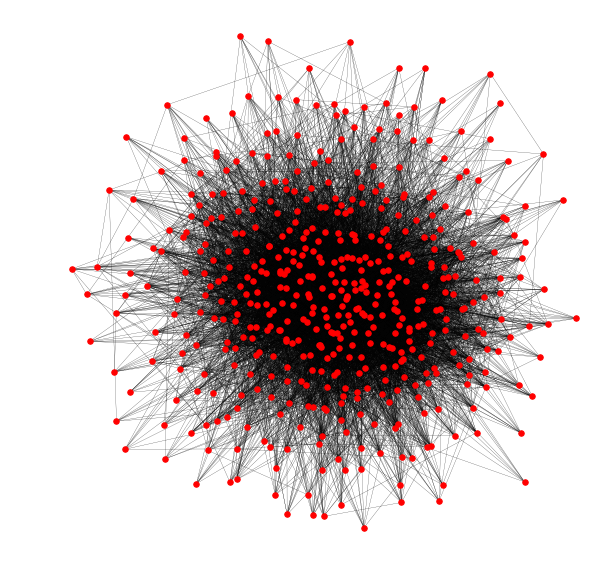

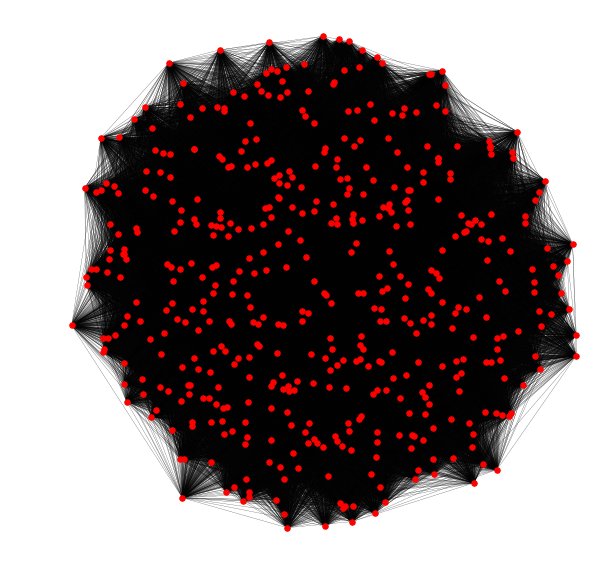

min deg 	 average deg 	 max deg 	 diameter 	 triangle 	 shortest path
(247, 352.73790322580646, 489, 2, 8049577, 1.2873981753014012)


In [17]:
reply_retweet_S = []
common = (set(retweetG.nodes) & set(replyG.nodes))
for k in [2, 4, 6, 8]:
    S, mindeg = k_conn_min_deg(replyG.subgraph(common), retweetG.subgraph(common), k, verbose=False)
    print 'size of dense-connected subgraph', len(S)
    print '# of edges in the k-connected reply subgraph', len(replyG.subgraph(S).edges)
    print '# of edges in the dense retweet subgraph', len(retweetG.subgraph(S).edges) 
    
    plot_S(dict(), S, replyG, retweetG, fig_prefix + 'reply_retweet_k=' + str(k))

    reply_retweet_S.append(S)

size of dense-connected subgraph 359
# of edges in the k-connected retweet subgraph 19515
# of edges in the dense reply subgraph 14816


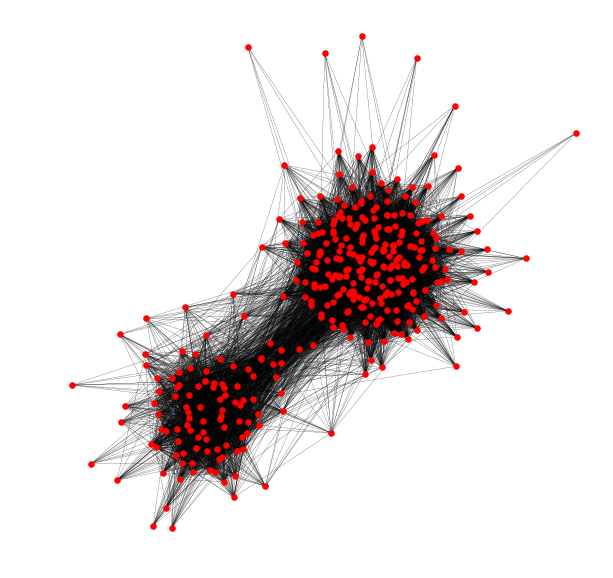

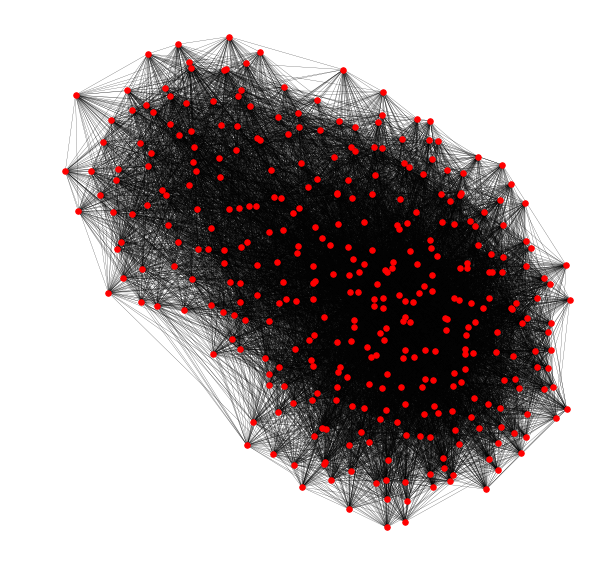

min deg 	 average deg 	 max deg 	 diameter 	 triangle 	 shortest path
(52, 82.54038997214485, 217, 3, 149782, 1.7716655514231026)
size of dense-connected subgraph 359
# of edges in the k-connected retweet subgraph 19515
# of edges in the dense reply subgraph 14816


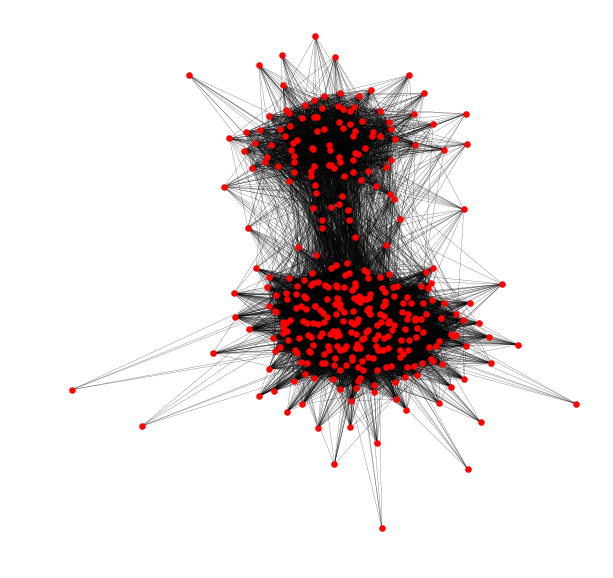

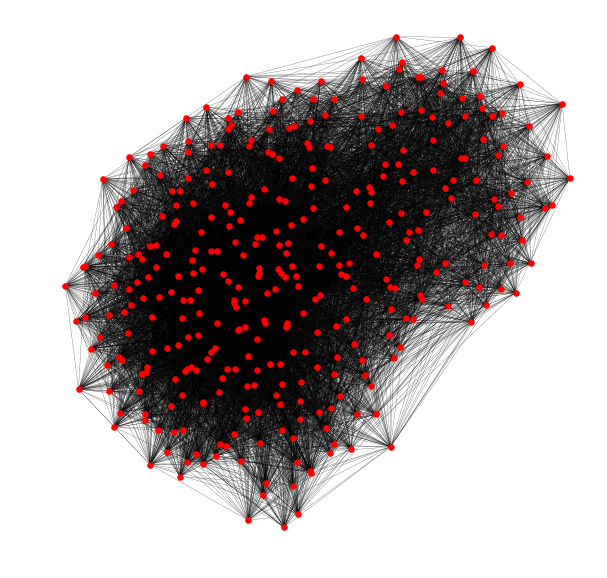

min deg 	 average deg 	 max deg 	 diameter 	 triangle 	 shortest path
(52, 82.54038997214485, 217, 3, 149782, 1.7716655514231026)
size of dense-connected subgraph 515
# of edges in the k-connected retweet subgraph 32324
# of edges in the dense reply subgraph 22651


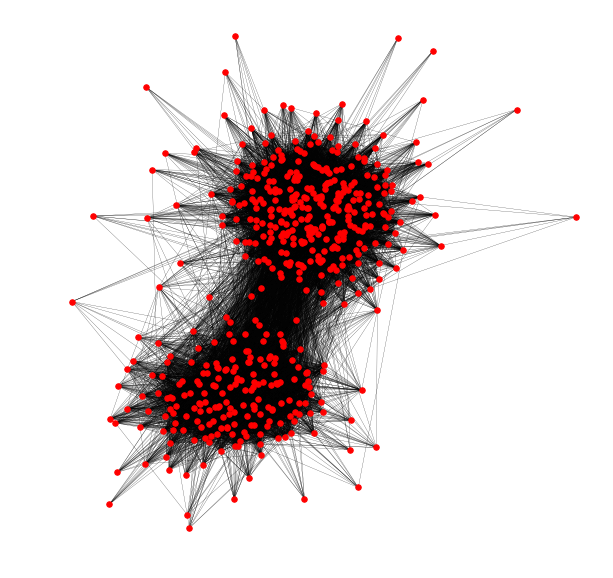

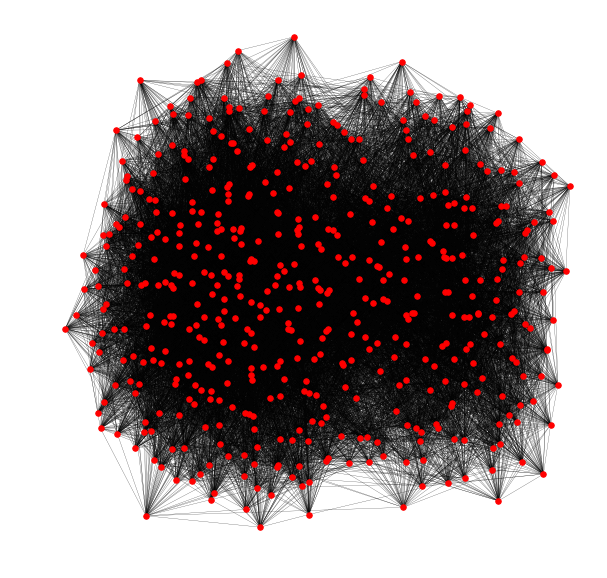

min deg 	 average deg 	 max deg 	 diameter 	 triangle 	 shortest path
(51, 87.96504854368932, 276, 3, 214812, 1.8356616674851725)
size of dense-connected subgraph 462
# of edges in the k-connected retweet subgraph 28149
# of edges in the dense reply subgraph 19893


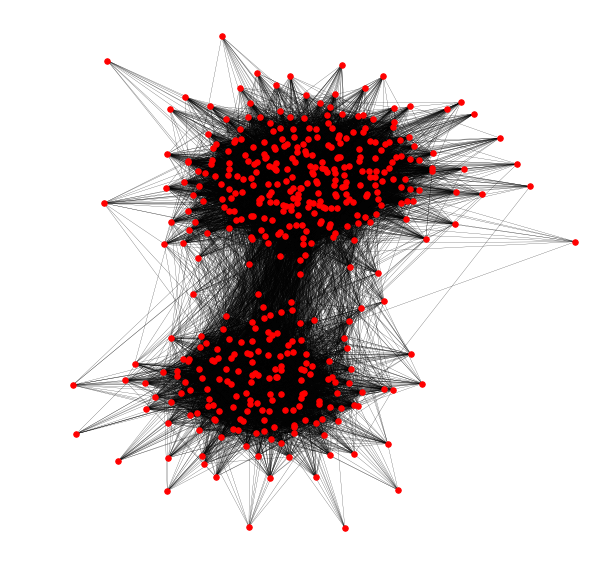

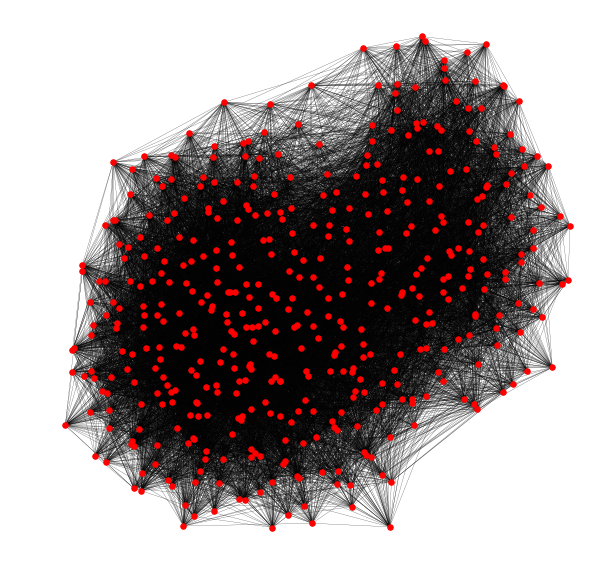

min deg 	 average deg 	 max deg 	 diameter 	 triangle 	 shortest path
(51, 86.11688311688312, 261, 3, 192543, 1.8179001042341607)


In [18]:
retweet_reply_S = []
common = (set(retweetG.nodes) & set(replyG.nodes))
for k in [2, 4, 6, 8]:
    S, mindeg = k_conn_min_deg(retweetG.subgraph(common), replyG.subgraph(common), k, verbose=False)
    print 'size of dense-connected subgraph', len(S)
    print '# of edges in the k-connected retweet subgraph', len(retweetG.subgraph(S).edges)
    print '# of edges in the dense reply subgraph', len(replyG.subgraph(S).edges) 
    
    plot_S(dict(), S, retweetG, replyG, fig_prefix + 'retweet_reply_k=' + str(k))
    
    retweet_reply_S.append(S)

In [ ]:
followG, cur_node_ind = read_graph('follow', node_map, cur_node_ind)

In [ ]:
common = (set(retweetG.nodes) & set(followG.nodes))

print '# of common nodes in retweet and quote', len(common)
print '# of edges in the retweet subgraph induced by common nodes', len(retweetG.subgraph(common).edges)
print '# of edges in the follow subgraph induced by common nodes', len(followG.subgraph(common).edges)    


In [ ]:
start_time = time.time()
S, mindeg = k_conn_min_deg(retweetG.subgraph(common), followG.subgraph(common), 2, verbose=False)
print time.time() - start_time

size of dense-connected subgraph 1030
# of edges in the k-connected retweet subgraph 92620
# of edges in the dense follow subgraph 183664


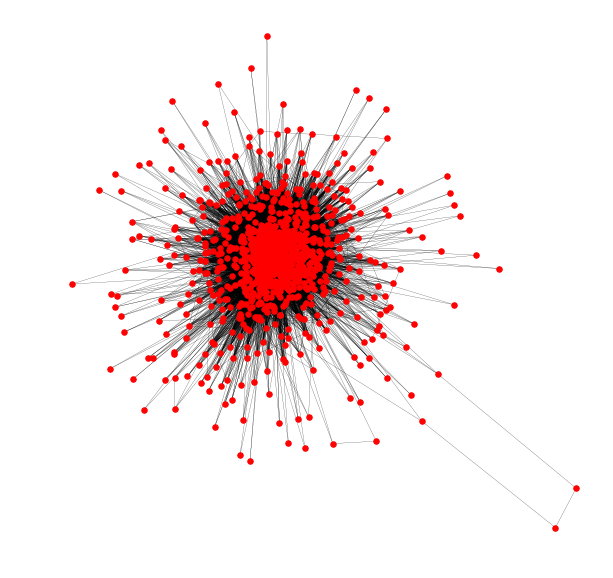

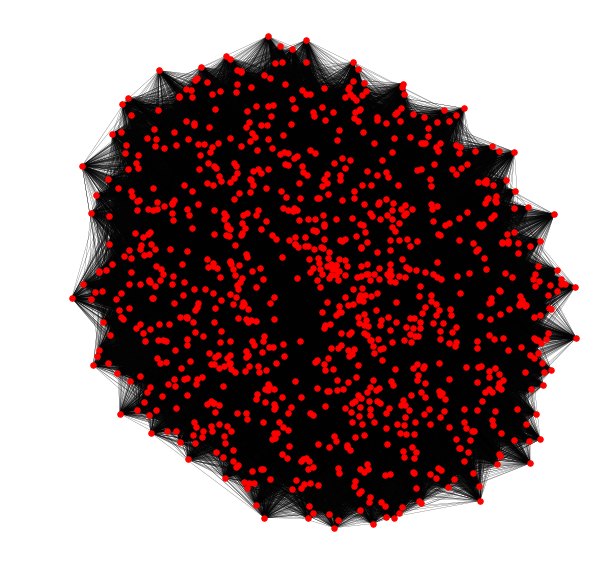

min deg 	 average deg 	 max deg 	 diameter 	 triangle 	 shortest path
(219, 356.62912621359226, 966, 2, 9087960, 1.6534216460509308)


In [ ]:
retweet_follow_S = []
common = (set(retweetG.nodes) & set(followG.nodes))
for k in [2]:
    S, mindeg = k_conn_min_deg(retweetG.subgraph(common), followG.subgraph(common), k, verbose=False)
    print 'size of dense-connected subgraph', len(S)
    print '# of edges in the k-connected retweet subgraph', len(retweetG.subgraph(S).edges)
    print '# of edges in the dense follow subgraph', len(followG.subgraph(S).edges) 
    
    if mindeg==0:
        print 'subgraph h not connected.'
        break
    
    plot_S(dict(), S, retweetG, followG, fig_prefix + 'retweet_follow_k=' + str(k))

    retweet_follow_S.append(S)

size of dense-connected subgraph 931
# of edges in the k-connected retweet subgraph 88646
# of edges in the dense follow subgraph 151249


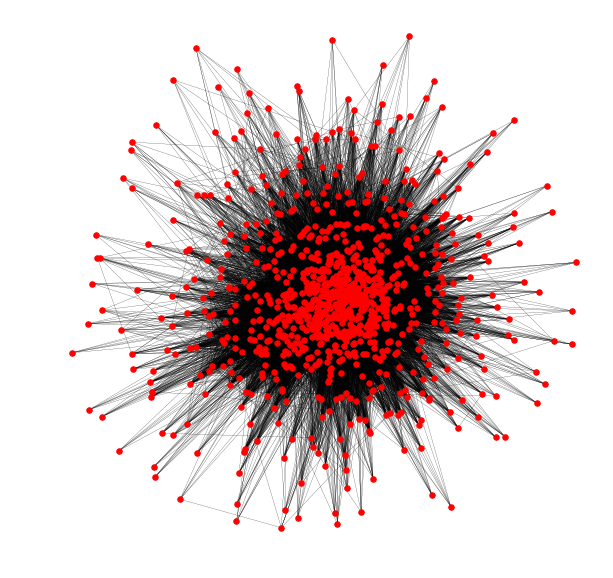

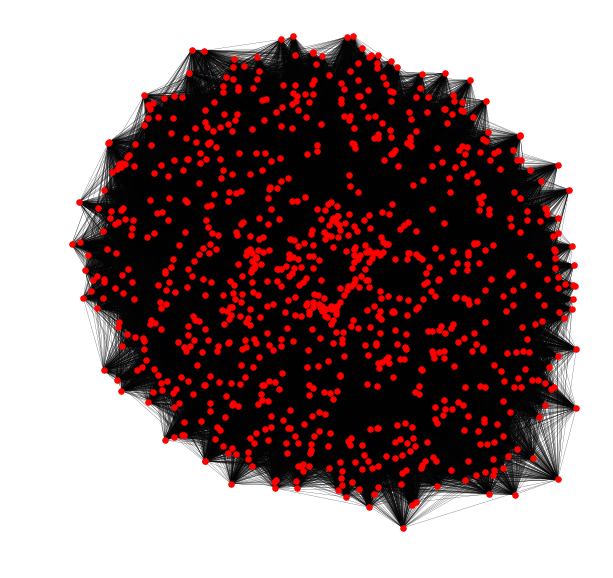

min deg 	 average deg 	 max deg 	 diameter 	 triangle 	 shortest path
(198, 324.9172932330827, 874, 2, 6867832, 1.65062656641604)


In [10]:
retweet_follow_S = []
common = (set(retweetG.nodes) & set(followG.nodes))
for k in [6]:
    S, mindeg = k_conn_min_deg(retweetG.subgraph(common), followG.subgraph(common), k, verbose=False)
    print 'size of dense-connected subgraph', len(S)
    print '# of edges in the k-connected retweet subgraph', len(retweetG.subgraph(S).edges)
    print '# of edges in the dense follow subgraph', len(followG.subgraph(S).edges) 
    
    if mindeg==0:
        print 'subgraph h not connected.'
        break
    
    plot_S(dict(), S, retweetG, followG, fig_prefix + 'retweet_follow_k=' + str(k))

    retweet_follow_S.append(S)

size of dense-connected subgraph 620
# of edges in the k-connected follow subgraph 32742
# of edges in the dense retweet subgraph 128689


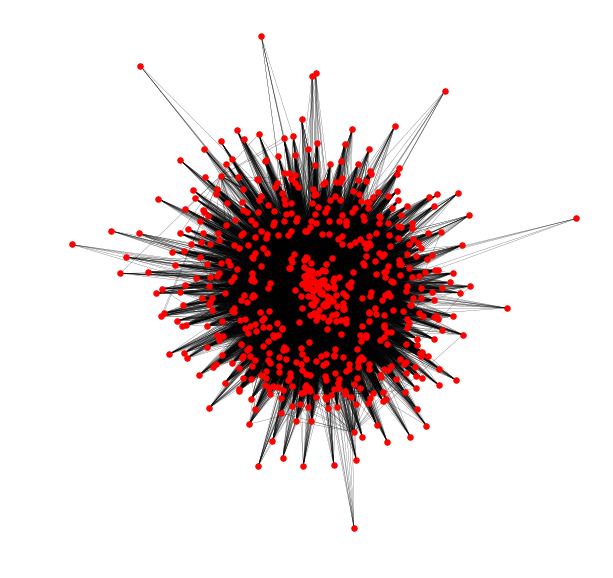

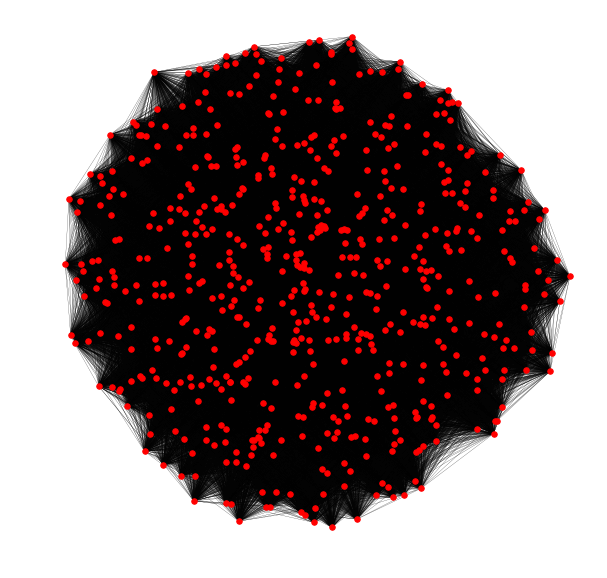

min deg 	 average deg 	 max deg 	 diameter 	 triangle 	 shortest path
(285, 415.1258064516129, 613, 2, 13470812, 1.3293605711605607)
size of dense-connected subgraph 612
# of edges in the k-connected follow subgraph 32419
# of edges in the dense retweet subgraph 126378


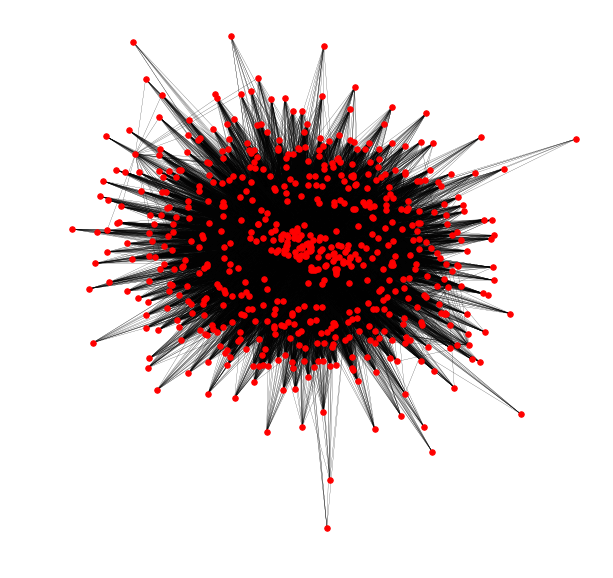

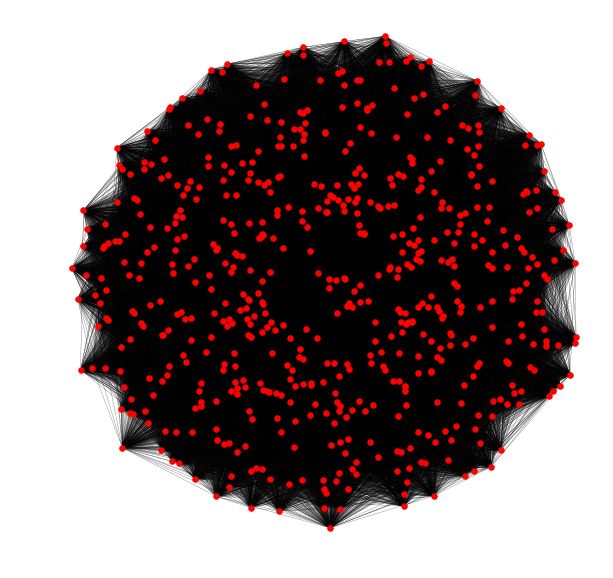

min deg 	 average deg 	 max deg 	 diameter 	 triangle 	 shortest path
(285, 413.0, 606, 2, 13212695, 1.3240589198036006)


In [9]:
follow_retweet_S = []
common = (set(retweetG.nodes) & set(followG.nodes))
for k in [2, 6]:
    S, mindeg = k_conn_min_deg(followG.subgraph(common), retweetG.subgraph(common), k, verbose=False)
    print 'size of dense-connected subgraph', len(S)
    print '# of edges in the k-connected follow subgraph', len(followG.subgraph(S).edges)
    print '# of edges in the dense retweet subgraph', len(retweetG.subgraph(S).edges) 
    
    if mindeg==0:
        print 'subgraph h not connected.'
        break
    
    plot_S(dict(), S, followG, retweetG, fig_prefix + 'follow_retweet_k=' + str(k))
    
    follow_retweet_S.append(S)

In [9]:

print len(followG.nodes), len(followG.edges)

16144287 28395679


In [10]:
start_time = time.time()
k_connected_components(followG, 3)
print time.time() - start_time

2521.20681095


In [30]:
reply_quote_S = []
for k in [53]:
    S, mindeg = k_conn_min_deg(replyG.subgraph(common), quoteG.subgraph(common), k, verbose=False)
    print 'size of dense-connected subgraph', len(S)
    print '# of edges in the k-connected reply subgraph', len(replyG.subgraph(S).edges)
    print '# of edges in the dense quote subgraph', len(quoteG.subgraph(S).edges) 
    if mindeg==0:
        print 'subgraph h not connected.'
        break
#     plot_S(dict(), S, replyG, quoteG, fig_prefix + 'reply_quote_k=' + str(k), plot=False)
    
    
    reply_quote_S.append(S)


size of dense-connected subgraph 0
# of edges in the k-connected reply subgraph 0
# of edges in the dense quote subgraph 0
subgraph h not connected.
